# Trabalho de Cálculo I: Aproximação de Integrais Não Elementares

Este notebook implementa a aproximação da integral da função **`f(x) = e^(-x^2)`** no intervalo **`[0, 1]`** utilizando a Série de Maclaurin.

O objetivo é seguir os passos definidos nas especificações do trabalho:
1.  Apresentar as expressões analíticas do Polinômio de Taylor e sua integral.
2.  Implementar o cálculo da integral aproximada em Python.
3.  Calcular um valor de referência usando `SciPy`.
4.  Gerar uma tabela de resultados e analisar o erro da aproximação.
5.  **Visualizar os resultados com gráficos para ter melhor clareza e compreensão.**

In [13]:
# Célula de Código 1: Configuração e Importações

import numpy as np
import math
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt

# Estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# Definição da função a ser integrada
def f(x):
    """Função original e^(-x^2)"""
    return np.exp(-x**2)

# Definição das constantes do problema
X1, X2 = 0, 1          # Intervalo de integração [x1, x2]
A = 0                  # Ponto de expansão da série (a=0 -> Maclaurin)
ORDERS = [3, 5, 7]     # Ordens do polinômio a serem analisadas

print("Bibliotecas importadas e constantes definidas com sucesso.")

Bibliotecas importadas e constantes definidas com sucesso.


## 4.1. Apresentação do Polinômio de Taylor e da Integral Aproximada

A Série de Maclaurin para `e^(-x^2)` é dada por:
`P(x) = 1 - x^2 + x^4/2! - x^6/3! + ...`

A seguir, definimos funções para gerar as expressões do polinômio `P_n(x)` e de sua integral definida para cada ordem `n`.

In [8]:
# Célula de Código 2: Funções para gerar as expressões analíticas

def get_polynomial_string(n):
    """Gera uma string representando o Polinômio P_n(x) para e^(-x^2)"""
    terms = []
    # O polinômio P_n(x) para e^(-x^2) tem termos até a potência 2*k <= n
    for k in range(int(n / 2) + 1):
        sign = "-" if k % 2 != 0 else "+"
        if k == 0: sign = ""
        
        den = math.factorial(k)
        power = 2 * k
        
        if k == 0:
            terms.append("1")
        elif den == 1:
            terms.append(f" {sign} x^{power}")
        else:
            terms.append(f" {sign} x^{power}/{den}")
            
    return "".join(terms).lstrip(" +")

def get_integrated_polynomial_string(n, x1, x2):
    """Gera a string da integral do polinômio P_n(x) de x1 a x2."""
    terms = []
    for k in range(int(n / 2) + 1):
        sign = "-" if k % 2 != 0 else "+"
        if k == 0: sign = ""

        den = math.factorial(k) * (2 * k + 1)
        power = 2 * k + 1
        
        if k == 0:
            terms.append("x")
        else:
            terms.append(f" {sign} x^{power}/{den}")

    antiderivative = "".join(terms).lstrip(" +")
    return f"Integral de [{antiderivative}] de {x1} a {x2}"

print("Funções de representação analítica definidas.")

Funções de representação analítica definidas.


In [9]:
# Célula de Código 3: Exibindo as expressões para cada ordem

for n in ORDERS:
    poly_str = get_polynomial_string(n)
    int_poly_str = get_integrated_polynomial_string(n, X1, X2)
    print(f"\n--- Ordem n = {n} ---")
    print(f"Polinômio P_{n}(x): {poly_str}")
    print(f"Integral a ser calculada: {int_poly_str}")


--- Ordem n = 3 ---
Polinômio P_3(x): 1 - x^2
Integral a ser calculada: Integral de [x - x^3/3] de 0 a 1

--- Ordem n = 5 ---
Polinômio P_5(x): 1 - x^2 + x^4/2
Integral a ser calculada: Integral de [x - x^3/3 + x^5/10] de 0 a 1

--- Ordem n = 7 ---
Polinômio P_7(x): 1 - x^2 + x^4/2 - x^6/6
Integral a ser calculada: Integral de [x - x^3/3 + x^5/10 - x^7/42] de 0 a 1


## 4.2. Implementação Computacional

Agora, implementamos a função que calcula a integral do polinômio de Maclaurin numericamente. Também usamos a função `scipy.integrate.quad` para obter um valor de referência de alta precisão para a integral da função original.

In [10]:
# Célula de Código 4: Função de integração e valor de referência

def integrate_maclaurin_approx(n, x1, x2):
    """
    Calcula a integral definida do Polinômio de Maclaurin de ordem n para e^(-x^2)
    usando o Teorema Fundamental do Cálculo na antiderivada termo a termo.
    """
    def antiderivative(x, order):
        total_sum = 0
        for k in range(int(order / 2) + 1):
            term = ((-1)**k * x**(2*k + 1)) / ((2*k + 1) * math.factorial(k))
            total_sum += term
        return total_sum

    return antiderivative(x2, n) - antiderivative(x1, n)

# Obtenção do Valor de Referência (item 4.2.3)
valor_referencia, _ = quad(f, X1, X2)

print(f"Função para integração aproximada definida.")
print(f"Valor de Referência (scipy.integrate.quad): {valor_referencia:.10f}")

Função para integração aproximada definida.
Valor de Referência (scipy.integrate.quad): 0.7468241328


## 4.3. Apresentação e Análise dos Resultados

Nesta seção, calculamos os valores da integral aproximada e o erro absoluto para cada ordem e os apresentamos em uma tabela.

In [11]:
# Célula de Código 5: Loop para processar os dados e gerar resultados

results_data = []
for n in ORDERS:
    # Calcular a integral aproximada
    integral_aproximada = integrate_maclaurin_approx(n, X1, X2)
    
    # Calcular o erro absoluto
    erro_absoluto = abs(valor_referencia - integral_aproximada)
    
    # Armazenar os resultados em um dicionário
    results_data.append({
        "Ordem (n)": n,
        "Integral Aproximada": integral_aproximada,
        "Valor de Referência (SciPy)": valor_referencia,
        "Erro Absoluto": erro_absoluto
    })

print("Resultados calculados com sucesso.")

Resultados calculados com sucesso.


In [14]:
# Célula de Código 6: Exibição da tabela de resultados com Pandas

# Criar um DataFrame do pandas para uma exibição clara
df_results = pd.DataFrame(results_data)

# Formatar a saída do DataFrame para melhor legibilidade
pd.options.display.float_format = '{:.10f}'.format

print("Tabela de Resultados:")
display(df_results) # 'display()' é preferível a 'print()' em notebooks para DataFrames

Tabela de Resultados:


,Ordem (n),Integral Aproximada,Valor de Referência (SciPy),Erro Absoluto
0,3,0.6666666667,0.7468241328,0.0801574661
1,5,0.7666666667,0.7468241328,0.0198425339
2,7,0.7428571429,0.7468241328,0.0039669900


### Análise Gráfica

Para entender melhor os resultados da tabela, vamos visualizar o comportamento das aproximações.

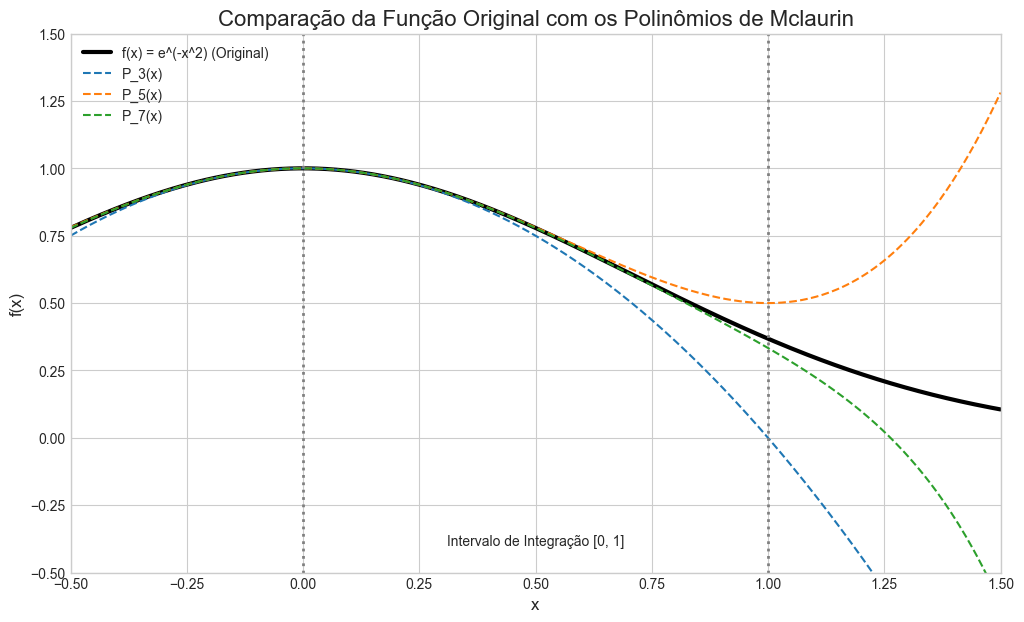

In [18]:
# Célula de Código 7: Gráfico - Comparação da Função Original com os Polinômios

# Função para calcular o valor do polinômio em um ponto
def maclaurin_poly(x, order):
    total_sum = 0
    for k in range(int(order / 2) + 1):
        term = ((-1)**k * x**(2*k)) / math.factorial(k)
        total_sum += term
    return total_sum

# Gerar pontos para o gráfico
x_vals = np.linspace(-0.5, 1.5, 400)
y_f = f(x_vals)

plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_f, label='f(x) = e^(-x^2) (Original)', linewidth=3, color='black')

# Plotar cada polinômio
for n in ORDERS:
    y_p = maclaurin_poly(x_vals, n)
    plt.plot(x_vals, y_p, label=f'P_{n}(x)', linestyle='--')

plt.title('Comparação da Função Original com os Polinômios de Mclaurin', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend()
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
# Linha vertical para marcar o intervalo de integração
plt.axvline(x=X1, color='gray', linestyle=':', linewidth=2)
plt.axvline(x=X2, color='gray', linestyle=':', linewidth=2)
plt.text(0.5, -0.4, 'Intervalo de Integração [0, 1]', ha='center')
plt.show()

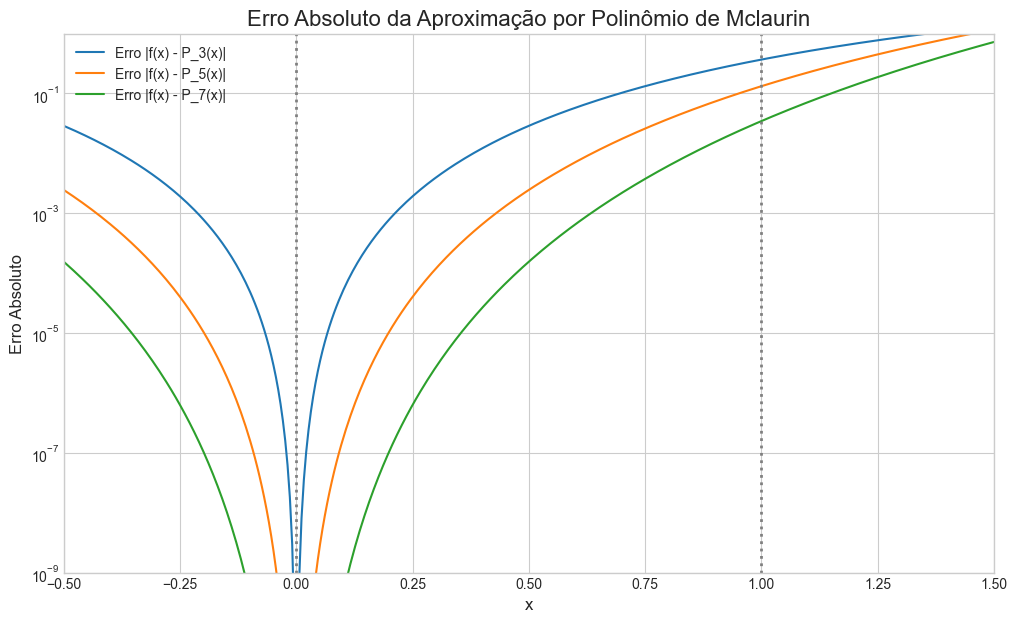

In [19]:
# Célula de Código 8: Gráfico - Erro da Aproximação

plt.figure(figsize=(12, 7))

# Plotar o erro para cada ordem
for n in ORDERS:
    error = np.abs(f(x_vals) - maclaurin_poly(x_vals, n))
    plt.plot(x_vals, error, label=f'Erro |f(x) - P_{n}(x)|')

plt.title('Erro Absoluto da Aproximação por Polinômio de Mclaurin', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('Erro Absoluto', fontsize=12)
plt.yscale('log') # Escala logarítmica para ver melhor as pequenas diferenças de erro
plt.legend()
plt.xlim(-0.5, 1.5)
plt.ylim(1e-9, 1) # Limites para a escala log
plt.axvline(x=X1, color='gray', linestyle=':', linewidth=2)
plt.axvline(x=X2, color='gray', linestyle=':', linewidth=2)
plt.show()

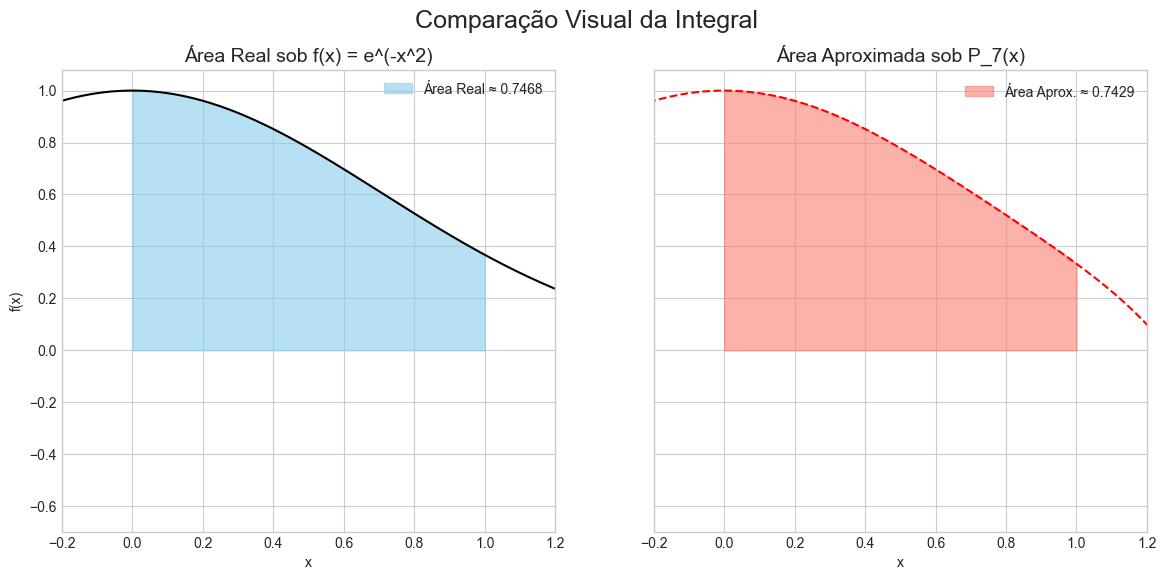

In [17]:
# Célula de Código 9: Gráfico - Visualização da Integral como Área

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 1. Área sob a curva real
x_fill = np.linspace(X1, X2, 100)
ax1.plot(x_vals, y_f, color='black')
ax1.fill_between(x_fill, f(x_fill), color='skyblue', alpha=0.6, label=f'Área Real ≈ {valor_referencia:.4f}')
ax1.set_title('Área Real sob f(x) = e^(-x^2)', fontsize=14)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()
ax1.set_xlim(-0.2, 1.2)

# 2. Área sob a melhor aproximação (P_7(x))
best_n = max(ORDERS)
y_p_best = maclaurin_poly(x_vals, best_n)
integral_aprox_best = df_results[df_results['Ordem (n)'] == best_n]['Integral Aproximada'].iloc[0]

ax2.plot(x_vals, y_p_best, color='red', linestyle='--')
ax2.fill_between(x_fill, maclaurin_poly(x_fill, best_n), color='salmon', alpha=0.6, label=f'Área Aprox. ≈ {integral_aprox_best:.4f}')
ax2.set_title(f'Área Aproximada sob P_{best_n}(x)', fontsize=14)
ax2.set_xlabel('x')
ax2.legend()
ax2.set_xlim(-0.2, 1.2)

fig.suptitle('Comparação Visual da Integral', fontsize=18)
plt.show()

### Comentários sobre o Processo e o Erro

1.  **Precisão vs. Ordem do Polinômio:**
    Tanto a tabela de resultados quanto o **Gráfico de Comparação** mostram claramente que a aproximação melhora com o aumento da ordem `n`. No gráfico, a curva de `P_7(x)` (ordem 7) está quase indistinguível da função original dentro do intervalo de integração `[0, 1]` .

2.  **Relação entre Erro, Ordem e Intervalo:**
    O **Gráfico de Erro** é particularmente revelador. Ele mostra que o erro é zero em `x=0` (o ponto de expansão) e cresce à medida que nos afastamos dele. A escala logarítmica no eixo y destaca que o erro para `n=7` é ordens de magnitude menor do que para `n=3`. Isso confirma que o aumento da ordem diminui drasticamente o erro, especialmente perto do centro de expansão.

3.  **Visualização da Integral e Comparação de Métodos:**
    O **Gráfico de Visualização da Integral** mostra que a área calculada usando o polinômio `P_7(x)` é visualmente muito semelhante à área real sob `f(x)`. Isso valida nosso método como uma boa aproximação. A pequena diferença entre os valores das áreas (`0.7468` vs `0.7429`) reflete o erro que ainda existe, mesmo para uma aproximação de ordem 7. O método `scipy.quad` continua sendo a ferramenta de precisão para cálculo numérico, mas a aproximação por séries nos deu uma compreensão profunda do *porquê* o método funciona.